<a href="https://colab.research.google.com/github/joelcapistrano/cifar10-cnn/blob/master/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network for CIFAR10**

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import cifar10

Load CIFAR10 dataset and prepare training/test sets

In [3]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Get number of labels
num_labels = len(np.unique(y_train))

# Convert labels to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Get image dimension (image is assumed to be square)
image_size = x_train.shape[1]

# Image to be processed as is (Square RGB)
input_shape = (image_size, image_size, 3)

# Normalize image values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

170500096/170498071 [==============================] - 11s 0us/step


The CNN Architecture has **three Conv2D layers** using the same kernel size and activation function. A function is set up to facilitate **hyperparameter tuning** (filters and dropout). **Categorical Crossentropy** is chosen as the loss function and **Accuracy** is chosen as the metric since the CNN will perform **single label classification** (i.e. only one label can be correct).

In [0]:
# CNN Architecture
# Conv2D-Conv2D-Conv2D-Flatten-Dense-Activation
# Batch Size set to 128
# 20 Epochs for each training/tuning run
def run_model(filters, dropout):
  model = Sequential()
  model.add(Conv2D(filters=filters,
                   kernel_size=3,
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(filters=filters,
                   kernel_size=3,
                   activation='relu'))
  model.add(MaxPooling2D(2))
  model.add(Conv2D(filters=filters,
                   kernel_size=3,
                   activation='relu'))
  model.add(Flatten())
  model.add(Dropout(dropout))
  model.add(Dense(num_labels))
  model.add(Activation('softmax'))
  model.summary()

  model.compile(loss='categorical_crossentropy',
                optimizer='adam', 
                metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=20, batch_size=128)
  train_score = model.evaluate(x_train, y_train, batch_size=128)
  print("\nTrain accuracy: %.1f%%" % (100.0 * train_score[1]))
  test_score = model.evaluate(x_test, y_test, batch_size=128)
  print("\nTest accuracy: %.1f%%" % (100.0 * test_score[1]))

In [7]:
# Set filters to 64 and dropout to 0.2
run_model(64, 0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

With filters set to 64 and dropout set to 0.2, Training Data Accuracy is 80.8% and Test Data Accuracy is 73.6%. Next step is to see if accuracy will improve as we increase the number of filters.

In [8]:
# Set filters to 128 and dropout to 0.2
run_model(128, 0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)             

With filters set to 128 and dropout set to 0.2, Training Data Accuracy increased to 89.5% and Test Data Accuracy increased to 75.6%. We again check if accuracy will still improve as we further increase the number of filters.

In [9]:
# Set filters to 256 and dropout to 0.2
run_model(256, 0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)             

With filters set to 256 and dropout set to 0.2, Training Data Accuracy increased to 95.3% and Test Data Accuracy increased to 76.6%. We again check if accuracy will still improve as we further increase the number of filters.

In [10]:
# Set filters to 512 and dropout to 0.2
run_model(512, 0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 512)       14336     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 512)       2359808   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 512)         2359808   
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8192)             

With filters set to 512 and dropout set to 0.2, Training Data Accuracy increased to 95.9% but Test Data Accuracy decreased to 73.3%. We take a step back and choose 256 as the number of filters since it generated the highest Test Data Accuracy (before it started to decrease). Next step is to see if accuracy will improve as we increase the dropout value.

In [11]:
# Set filters to 256 and dropout to 0.4
run_model(256, 0.4)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4096)             



With filters set to 256 and dropout set to 0.4, Training Data Accuracy decreased to 91.7% but Test Data Accuracy increased to 77.0%. We again check if accuracy will still improve as we further increase the dropout value.

In [12]:
# Set filters to 256 and dropout to 0.5
run_model(256, 0.5)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4096)             

With filters set to 256 and dropout set to 0.5, Training Data Accuracy increased to 92.5% and Test Data Accuracy increased to 77.73%. We again check if accuracy will still improve as we further increase the dropout value.

In [13]:
# Set filters to 256 and dropout to 0.6
run_model(256, 0.6)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4096)             

With filters set to 256 and dropout set to 0.6, Training Data Accuracy decreased to 87.8% and Test Data Accuracy decreased to 77.72%. We take a step back and choose 0.5 as the dropout value since it generated the highest Test Data Accuracy (before it started to decrease).

After hyperparameter tuning, we now train the CNN over **200 epochs**. For every 20th epoch, Training & Test Data Accuracies are generated for evaluation. 

In [14]:
# Set chosen hyperparameter values
filters = 256
dropout = 0.5

model = Sequential()
model.add(Conv2D(filters=filters,
                   kernel_size=3,
                   activation='relu',
                   input_shape=input_shape))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=filters,
                   kernel_size=3,
                   activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=filters,
                   kernel_size=3,
                   activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
  
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

# Train the CNN
i = 1
epoch = 20
epoch_num = []
train_acc = []
test_acc = []
while i <= 10:
  epoch_num.append(epoch * i)
  model.fit(x_train, y_train, epochs=20, batch_size=128)
  train_score = model.evaluate(x_train, y_train, batch_size=128)
  print("\nTrain accuracy: %.1f%%" % (100.0 * train_score[1]))
  train_acc.append(train_score[1])
  test_score = model.evaluate(x_test, y_test, batch_size=128)
  print("\nTest accuracy: %.1f%%" % (100.0 * test_score[1]))
  test_acc.append(test_score[1])
  i = i + 1

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4096)             

The model's Training and Test Data Accuracy is plotted against the number of epochs performed during training. Looking at the plot, it can be observed that **as the number of epochs increase, Training Data Accuracy increases**. On the other hand, **Test Data Accuracy is fluctuating around 0.77-0.78**.

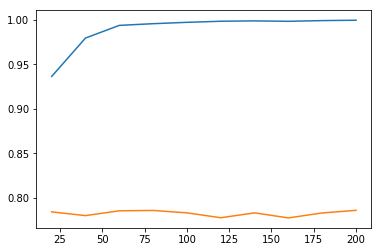

In [15]:
# Generate plot showing Training & Test Data Accuracy
plt.plot(epoch_num, train_acc)
plt.plot(epoch_num, test_acc)
plt.show()

In [16]:
# Generate table showing Training & Test Data Accuracy
df = pd.DataFrame(pd.concat([pd.Series(epoch_num),pd.Series(train_acc),pd.Series(test_acc)], axis=1))
df.columns = ['Epoch','Training Data Accuracy','Test Data Acccuracy']
df

,Epoch,Training Data Accuracy,Test Data Acccuracy
0,20,0.93638,0.7840
1,40,0.97960,0.7798
2,60,0.99386,0.7852
3,80,0.99576,0.7856
4,100,0.99730,0.7829
5,120,0.99850,0.7774
6,140,0.99890,0.7829
7,160,0.99844,0.7772
8,180,0.99924,0.7828
9,200,0.99964,0.7857


**CNN was able to generate higher Test Data Accuracy than MLP (MLP @ 52.89%, CNN @ 78.57%)**. CNN's method of extracting features from the image (Conv2D, Max Pooling) allows **highly distinctive areas of the image to standout**. This ability to develop an internal representation of a two-dimensional image makes CNN more efficient at training and ultimately better at making predictions than MLP when it comes to **image data**.